**Predict CO2Emissions based of correlated features.**

### Import Libraries

In [40]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Get data

In [3]:
data = pd.read_csv("CO2 Emissions_Canada.csv")

**Have an overview of the entire dataset**

In [4]:
data.head()

,Make,Model,Vehicle Class,EngineSize,Cylinders,Transmission,FuelType,FuelConsumptionCity,FuelConsumptionHwy,FuelConsumptionComb,FuelConsumptionComb.1,CO2Emissions
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


**Select some features ('EngineSize','Cylinders','FuelConsumptionComb', 'CO2Emissions') to explore more.**


In [5]:
features=data[["EngineSize","Cylinders","FuelConsumptionComb","CO2Emissions"]]

**Visualise relationships between all columns.**

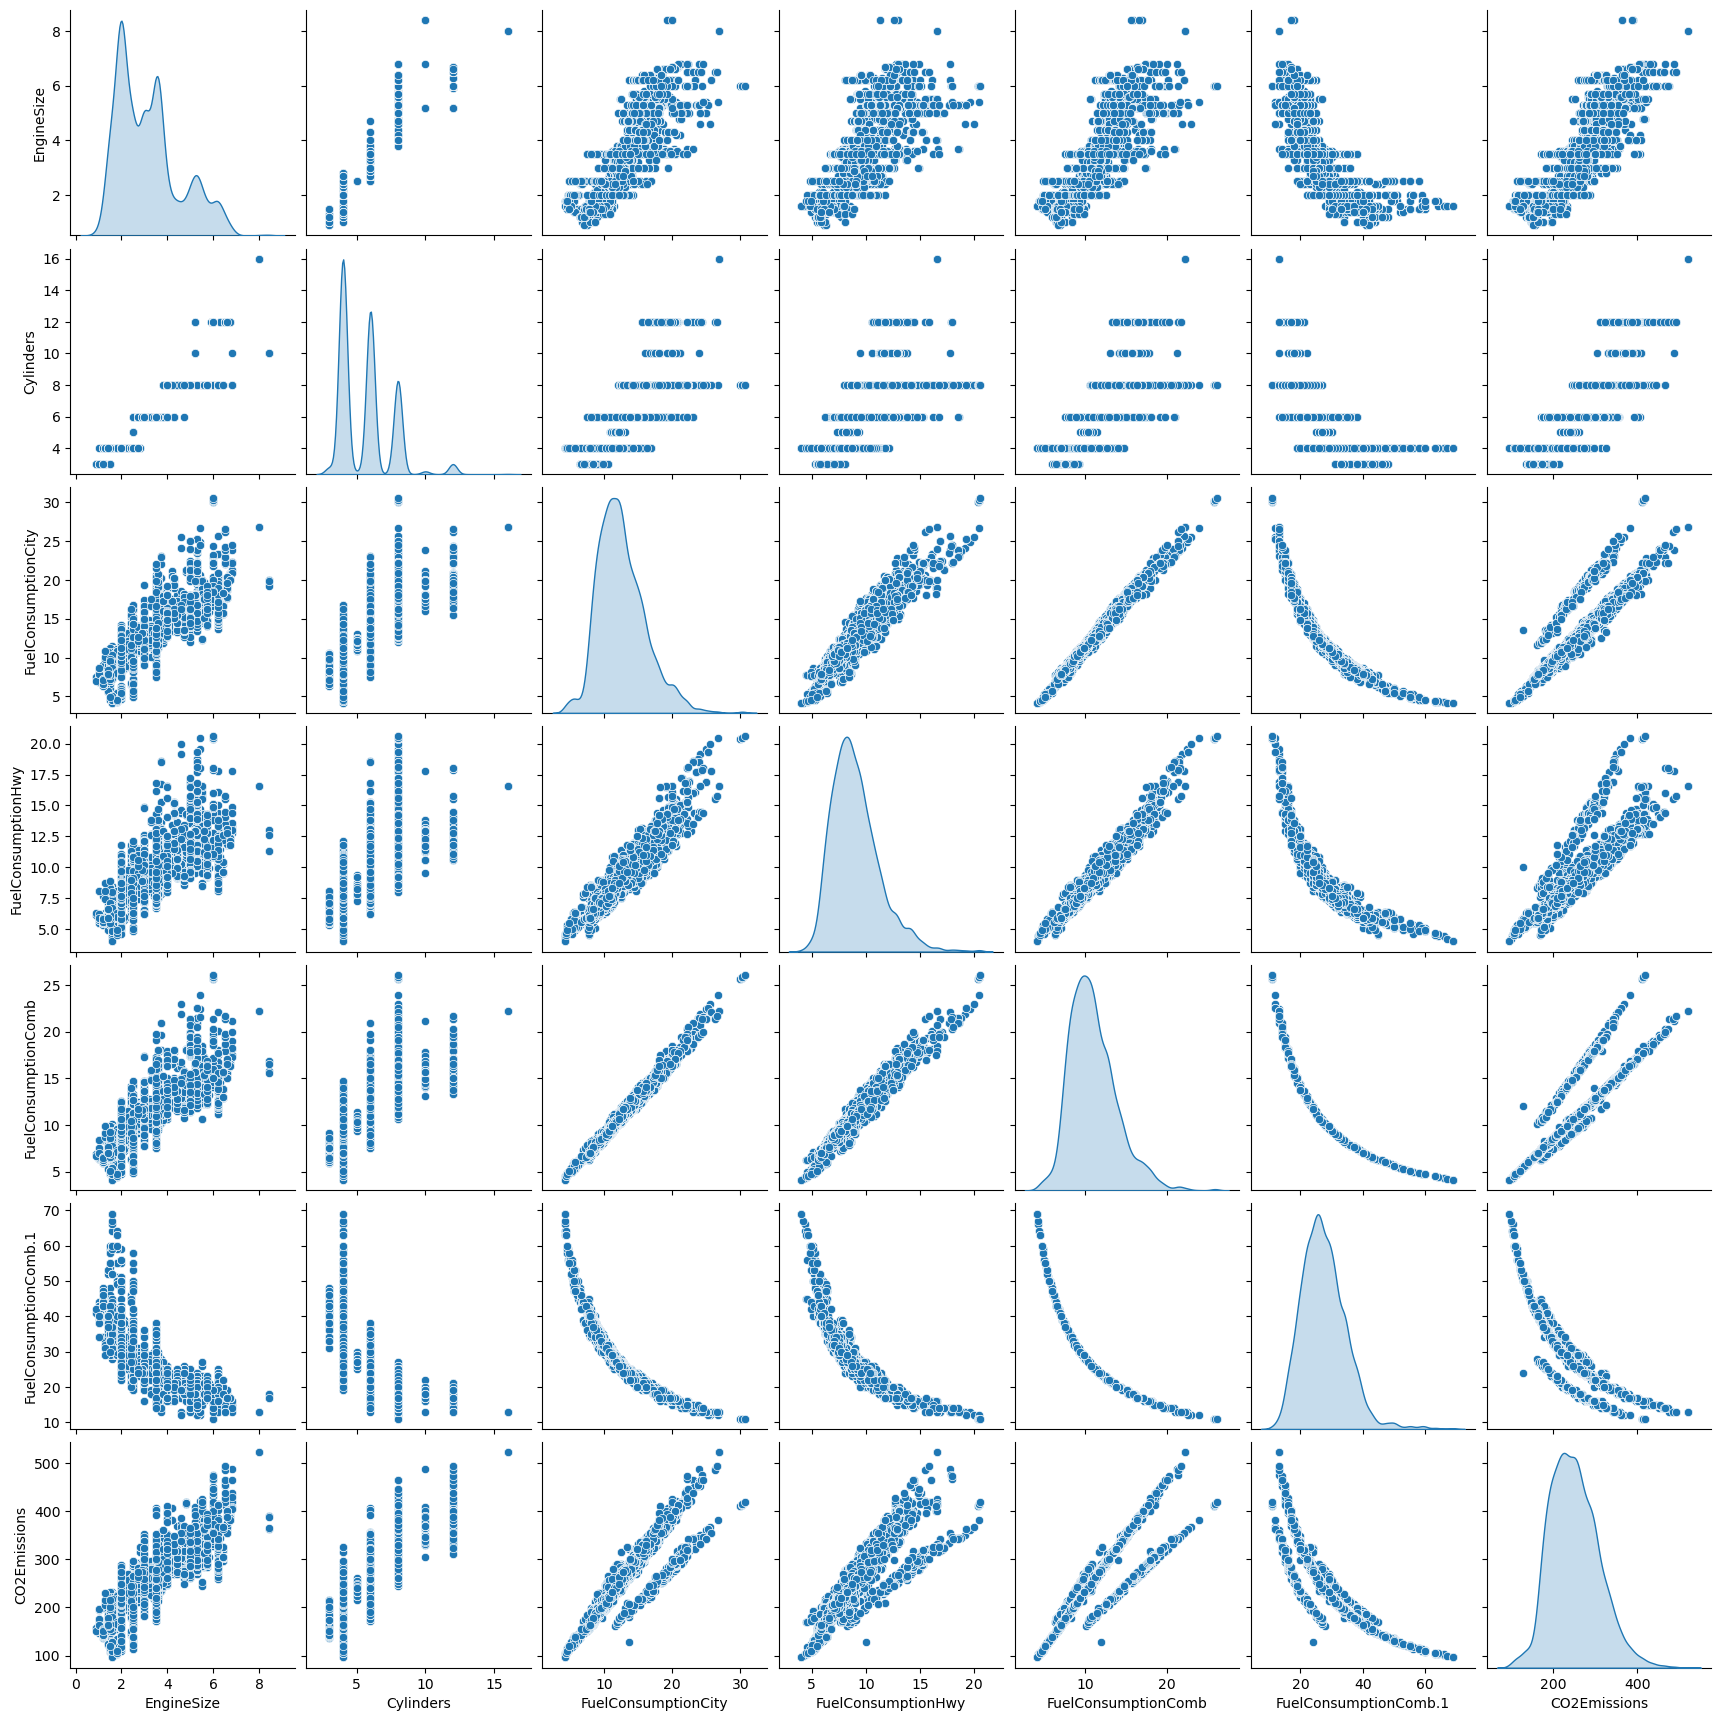

In [14]:
sns.pairplot(data,diag_kind='kde')

**Visualize histogram of CO2Emissions**

<AxesSubplot:xlabel='CO2Emissions', ylabel='Count'>

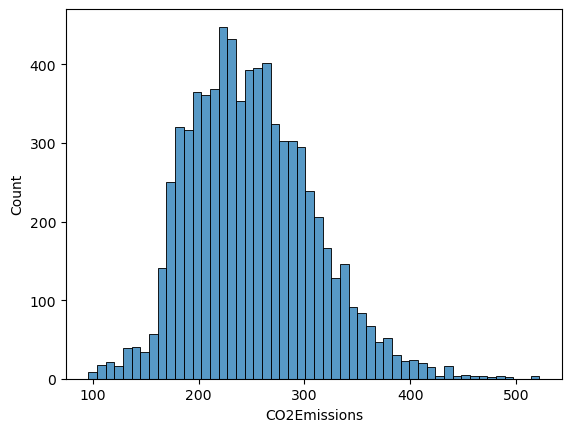

In [12]:
sns.histplot(data=data["CO2Emissions"])

**Visualize the correlation heatmap between variables**

<AxesSubplot:>

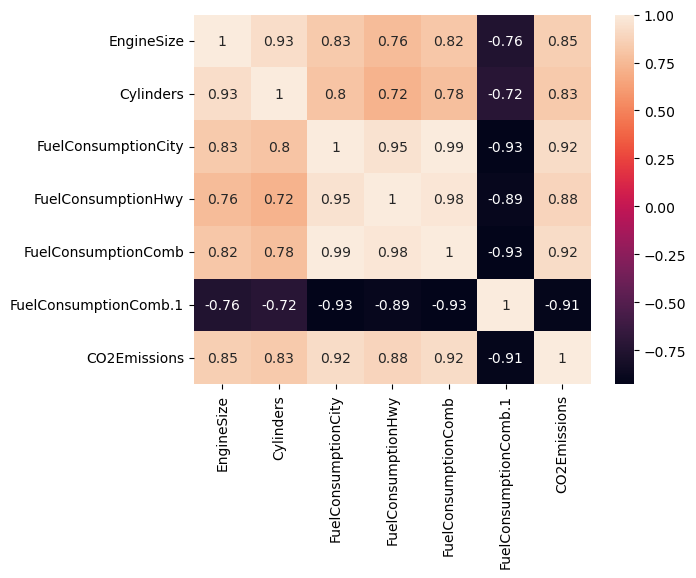

In [42]:
sns.heatmap(data.corr(),annot=True)

### Train-test Dataset

Splitting Data into Training Data Set and Test Data Set.

In [15]:
from sklearn.model_selection import train_test_split

**Split dependant variables y and independant variables x**

In [43]:
X=data[["EngineSize","Cylinders","FuelConsumptionComb"]]
Y=data['CO2Emissions']

**Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [44]:
x_train , x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=101)

**how much data in train and in test ?**

In [45]:
print(len(x_train))
print(len(x_test))

5169
2216


## Creating and Training the Model

Train a LinearRegression model on our training data!


**Import from scikit learn.**

In [46]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model.**

In [47]:
reg_model=LinearRegression()

**Train/fit model on the training data.**

Make sure you only fit to the training data, in order to fairly evaluate your model's performance on future unseen data
Learn from Features, and their Associated true outcomes.

In [48]:
reg_model.fit(x_train,y_train)

LinearRegression()

### Predicting Test Data

Now that we have fit our model, let's evaluate its performance by predicting off the test values!

We want to fairly evaluate our model, so we get performance metrics on the test set (data the model has never seen before).


**Use .predict() to predict off the X_test set of the data.**

In [49]:
y_predict =reg_model.predict(x_test)

**Create a scatterplot of the real test values versus the predicted values.**

<AxesSubplot:xlabel='CO2Emissions'>

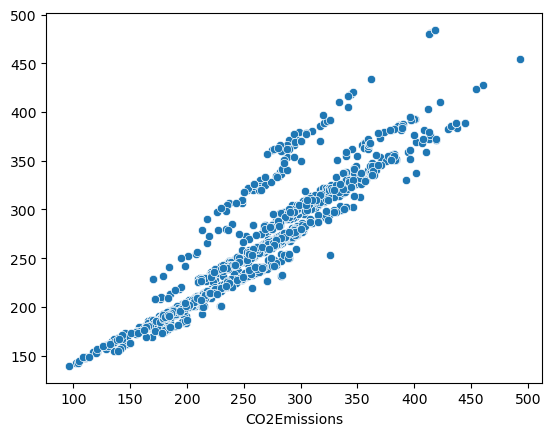

In [59]:
sns.scatterplot(x=y_test,y=y_predict)

### Evaluating the Model


The three most common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

**Calculate these metrics using skleanr**

In [54]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [56]:
MAE = mean_absolute_error(y_test,y_predict)
MSE = mean_squared_error(y_test,y_predict)
RMSE = np.sqrt(MSE)

In [58]:
print(MAE)
print(MSE)
print(RMSE)

13.181639917747386
412.1833096645877
20.30229813751605


**Plot a histogram of the residuals (difference between real labels and predicted labels) and make sure it looks normally distributed.** This helps us understand if Linear Regression was a valid model choice.

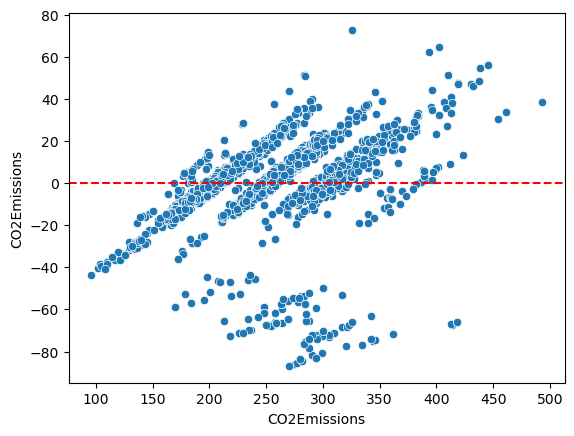

In [62]:
test_res = y_test - y_predict
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0, color='r', linestyle='--')

**Interpreting the coefficients of our model**

In [63]:
reg_model.coef_

array([ 4.88759591,  6.71692388, 13.47005044])

### Prediction on New Data

Recall , X_test data set looks exactly the same as brand new data, so we simply need to call .predict() just as before to predict sales for a new advertising campaign.

We want to predict a new car having an EngineSize of 4, Cylinders 5 and FuelConsCom of 14. What is the expected CO2Emmissions ?

In [65]:
new_data=[[2.5,4,8]]
reg_model.predict(new_data)

C:\Users\moham.DESKTOP-3UOA6L4\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([196.41948588])